#This notebook includes comprehensive comparisons of the LoRA (Low-Rank Adaptation) training performance between DeepSeek-R1 8B and LLaMA-3.1 8B models. The evaluation covers key metrics :

* Training and Evaluation Loss
* Evaluation Speed (Samples per Second)
* ROUGE Scores (1, 2, L)
* Mean Squared Error (MSE)
* Binary Accuracy
* Training Runtime & Efficiency

Key Takeways after compare these metrics :
<table>
    <tr>
        <th>Metric</th>
        <th>DeepSeek-R1 8B</th>
        <th>LLaMA-3.1 8B</th>
        <th>Best Choice</th>
    </tr>
    <tr>
        <td>Train Loss</td>
        <td>Slower convergence</td>
        <td>Faster convergence</td>
        <td>LLaMA-3.1 8B</td>
    </tr>
    <tr>
        <td>Eval Loss</td>
        <td>Higher loss</td>
        <td>Lower loss</td>
        <td>LLaMA-3.1 8B</td>
    </tr>
    <tr>
        <td>Evaluation Speed</td>
        <td>Faster</td>
        <td>Slower</td>
        <td>DeepSeek-R1 8B</td>
    </tr>
    <tr>
        <td>ROUGE Scores</td>
        <td>Higher</td>
        <td>Lower</td>
        <td>DeepSeek-R1 8B</td>
    </tr>
    <tr>
        <td>MSE</td>
        <td>Higher</td>
        <td>Lower</td>
        <td>LLaMA-3.1 8B</td>
    </tr>
    <tr>
        <td>Binary Accuracy</td>
        <td>Higher</td>
        <td>Lower</td>
        <td>DeepSeek-R1 8B</td>
    </tr>
    <tr>
        <td>Training Runtime</td>
        <td>Faster</td>
        <td>Slower</td>
        <td>DeepSeek-R1 8B</td>
    </tr>
</table>



In [2]:
# !pip install wandb
import wandb
import pandas as pd

wandb.login()
# fingpt-forecaster-llama3

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: xl3316 (xl3316-columbia-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [3]:
import wandb
import pandas as pd
#import ace_tools as tools

# Initialize W&B API
api = wandb.Api()

# Retrieve the run data
run_ds = api.run("xl3316-columbia-university/fingpt-forecaster/uqwvu14y")  # deepseek
run_l3 = api.run("/xl3316-columbia-university/fingpt-forecaster-llama3-lxy/runs/ao96fcjg") # llama3

# Get the run history (all logged metrics over time)
df_dsr1_h = run_ds.history(samples=10000)  # Adjust 'samples' to get more or fewer records
df_l3_h = run_l3.history(samples=10000)  # Adjust 'samples' to get more or fewer records

print(df_l3_h.head())  # Preview the first few rows
#print(df_dsr1_h.columns)  # List of available metrics
#print(df_dsr1_h.shape)

   _step    _runtime  train/loss  train/grad_norm  train/learning_rate  \
0      0  114.313162     11.0792         0.624526             0.000046   
1      1  223.524412      1.0681         6.238979             0.000050   
2      2  331.576344      0.4981         0.461879             0.000050   
3      3  482.164903         NaN              NaN                  NaN   
4      4  518.673369      0.3908         0.436549             0.000050   

   train/epoch    _timestamp  train/global_step  eval/loss  \
0     0.130081  1.740701e+09                 10        NaN   
1     0.260163  1.740701e+09                 20        NaN   
2     0.390244  1.740701e+09                 30        NaN   
3     0.494309  1.740702e+09                 38   0.380972   
4     0.520325  1.740702e+09                 40        NaN   

   eval/steps_per_second  ...  cons_rouge_scores.rouge2  \
0                    NaN  ...                       NaN   
1                    NaN  ...                       NaN   
2    

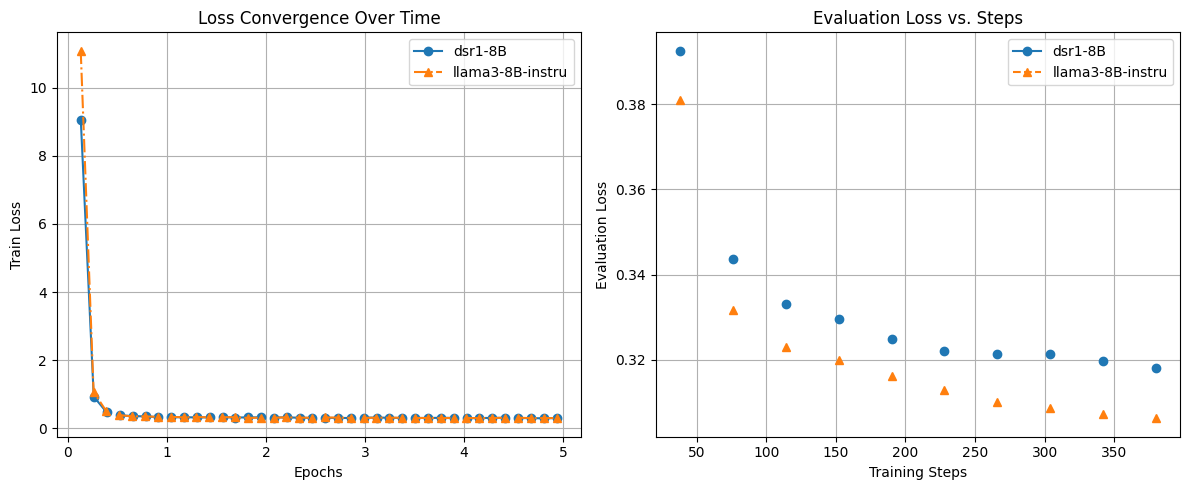

In [29]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figure size for better readability

# Left Plot: Train Loss vs. Epochs
axes[0].plot(df_dsr1_h['train/epoch'], df_dsr1_h['train/loss'], label="dsr1-8B", linestyle="-", marker="o")
axes[0].plot(df_l3_h['train/epoch'], df_l3_h['train/loss'], label="llama3-8B-instru", linestyle="-.", marker="^")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Train Loss")
axes[0].set_title("Loss Convergence Over Time")
axes[0].legend()
axes[0].grid(True)

# Right Plot: Evaluation Loss vs. Steps
axes[1].plot(df_dsr1_h['train/global_step'], df_dsr1_h['eval/loss'], label="dsr1-8B", linestyle="-", marker="o")
axes[1].plot(df_l3_h['train/global_step'], df_l3_h['eval/loss'], label="llama3-8B-instru", linestyle="--", marker="^")
axes[1].set_xlabel("Training Steps")
axes[1].set_ylabel("Evaluation Loss")
axes[1].set_title("Evaluation Loss vs. Steps")
axes[1].legend()
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


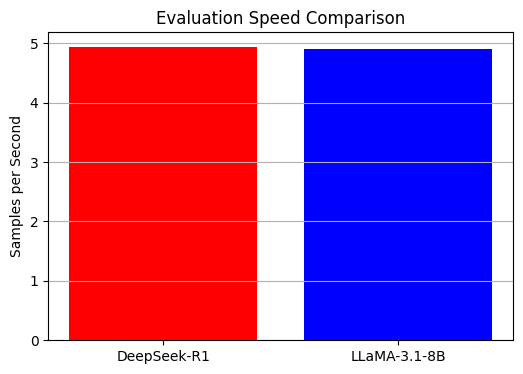

In [6]:
models = ["DeepSeek-R1","LLaMA-3.1-8B"]
eval_speed = [df_dsr1_h["eval/samples_per_second"].mean(), df_l3_h["eval/samples_per_second"].mean()]

plt.figure(figsize=(6, 4))
plt.bar(models, eval_speed, color=["red", "blue"])
plt.ylabel("Samples per Second")
plt.title("Evaluation Speed Comparison")
plt.grid(axis="y")
plt.show()

In [8]:
df_l3_h_0 = df_l3_h[['train/global_step','anal_rouge_scores.rouge1','anal_rouge_scores.rouge2','anal_rouge_scores.rougeL',"mse","bin_acc"]].dropna()
df_dsr1_h_0 = df_dsr1_h[['train/global_step','anal_rouge_scores.rouge1','anal_rouge_scores.rouge2','anal_rouge_scores.rougeL',"mse","bin_acc"]].dropna()
#dfll22 = dfll2[['train/global_step','anal_rouge_scores.rouge1','anal_rouge_scores.rouge2','anal_rouge_scores.rougeL',"mse","bin_acc"]].dropna()

In [11]:
df_l3_h_0.head()

,train/global_step,anal_rouge_scores.rouge1,anal_rouge_scores.rouge2,anal_rouge_scores.rougeL,mse,bin_acc
14,120,0.423304,0.130732,0.219355,10.090909,0.477273
19,160,0.419689,0.122707,0.218813,10.795918,0.551020
24,200,0.435781,0.129543,0.224330,11.959184,0.469388
28,230,0.428468,0.124483,0.224471,13.469388,0.428571
33,270,0.428947,0.128088,0.222974,10.918367,0.448980


In [12]:
df_dsr1_h_0.head()

,train/global_step,anal_rouge_scores.rouge1,anal_rouge_scores.rouge2,anal_rouge_scores.rougeL,mse,bin_acc
14,120,0.436034,0.129906,0.218554,14.380000,0.480000
19,160,0.431116,0.129048,0.214375,15.080000,0.540000
24,200,0.441730,0.133406,0.218922,12.530612,0.571429
28,230,0.423254,0.121599,0.217410,12.900000,0.400000
33,270,0.423854,0.130156,0.218356,11.102041,0.448980


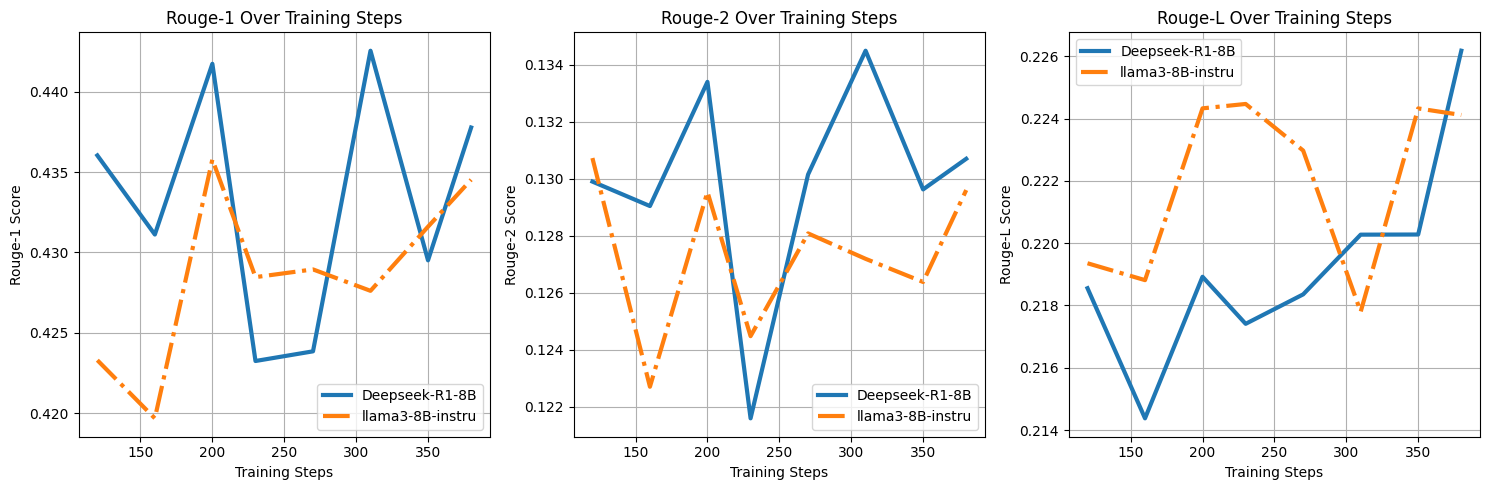

In [31]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figure size for better readability

# Plot 1: Rouge-1 Score
axes[0].plot(df_dsr1_h_0['train/global_step'], df_dsr1_h_0['anal_rouge_scores.rouge1'], label="Deepseek-R1-8B", linestyle="-", linewidth=3)
axes[0].plot(df_l3_h_0['train/global_step'], df_l3_h_0['anal_rouge_scores.rouge1'], label="llama3-8B-instru", linestyle="-.", linewidth=3)
axes[0].set_xlabel("Training Steps")
axes[0].set_ylabel("Rouge-1 Score")
axes[0].set_title("Rouge-1 Over Training Steps")
axes[0].legend()
axes[0].grid(True)

# Plot 2: Rouge-2 Score
axes[1].plot(df_dsr1_h_0['train/global_step'], df_dsr1_h_0['anal_rouge_scores.rouge2'], label="Deepseek-R1-8B", linestyle="-", linewidth=3)
axes[1].plot(df_l3_h_0['train/global_step'], df_l3_h_0['anal_rouge_scores.rouge2'], label="llama3-8B-instru", linestyle="-.", linewidth=3)
axes[1].set_xlabel("Training Steps")
axes[1].set_ylabel("Rouge-2 Score")
axes[1].set_title("Rouge-2 Over Training Steps")
axes[1].legend()
axes[1].grid(True)

# Plot 3: Rouge-L Score
axes[2].plot(df_dsr1_h_0['train/global_step'], df_dsr1_h_0['anal_rouge_scores.rougeL'], label="Deepseek-R1-8B", linestyle="-", linewidth=3)
axes[2].plot(df_l3_h_0['train/global_step'], df_l3_h_0['anal_rouge_scores.rougeL'], label="llama3-8B-instru", linestyle="-.", linewidth=3)
axes[2].set_xlabel("Training Steps")
axes[2].set_ylabel("Rouge-L Score")
axes[2].set_title("Rouge-L Over Training Steps")
axes[2].legend()
axes[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


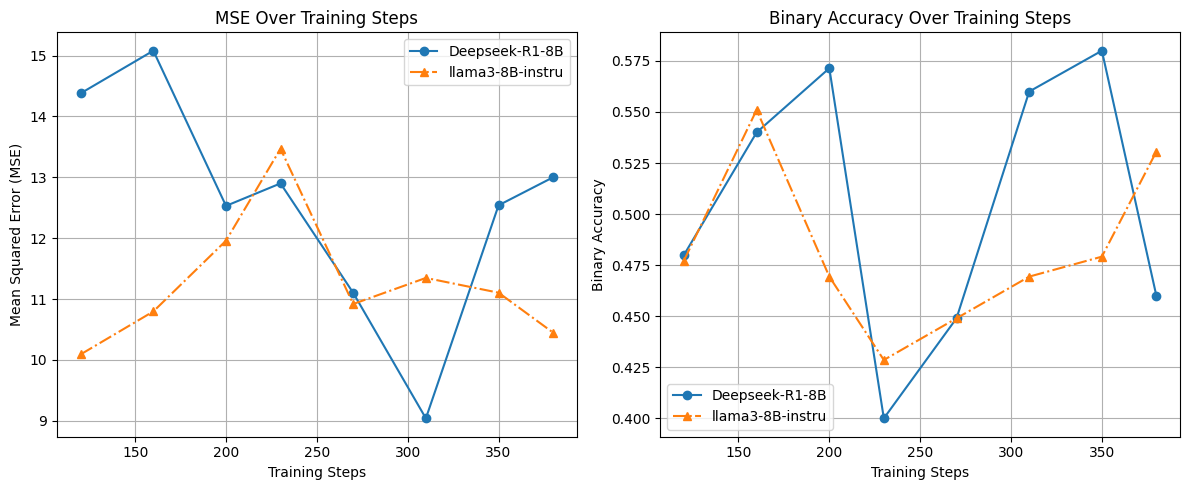

In [32]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust the figure size as needed

# Left Plot: MSE over Training Steps
axes[0].plot(df_dsr1_h_0['train/global_step'], df_dsr1_h_0["mse"], label="Deepseek-R1-8B", linestyle="-", marker="o")
axes[0].plot(df_l3_h_0['train/global_step'], df_l3_h_0["mse"], label="llama3-8B-instru", linestyle="-.", marker="^")
axes[0].set_xlabel("Training Steps")
axes[0].set_ylabel("Mean Squared Error (MSE)")
axes[0].set_title("MSE Over Training Steps")
axes[0].legend()
axes[0].grid(True)

# Right Plot: Binary Accuracy over Training Steps
axes[1].plot(df_dsr1_h_0['train/global_step'], df_dsr1_h_0["bin_acc"], label="Deepseek-R1-8B", linestyle="-", marker="o")
axes[1].plot(df_l3_h_0['train/global_step'], df_l3_h_0["bin_acc"], label="llama3-8B-instru", linestyle="-.", marker="^")
axes[1].set_xlabel("Training Steps")
axes[1].set_ylabel("Binary Accuracy")
axes[1].set_title("Binary Accuracy Over Training Steps")
axes[1].legend()
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [27]:
df_dsr1_h.columns

Index(['train/global_step', 'anal_rouge_scores.rouge1',
       'anal_rouge_scores.rouge2', 'anal_rouge_scores.rougeL', 'mse',
       'bin_acc'],
      dtype='object')

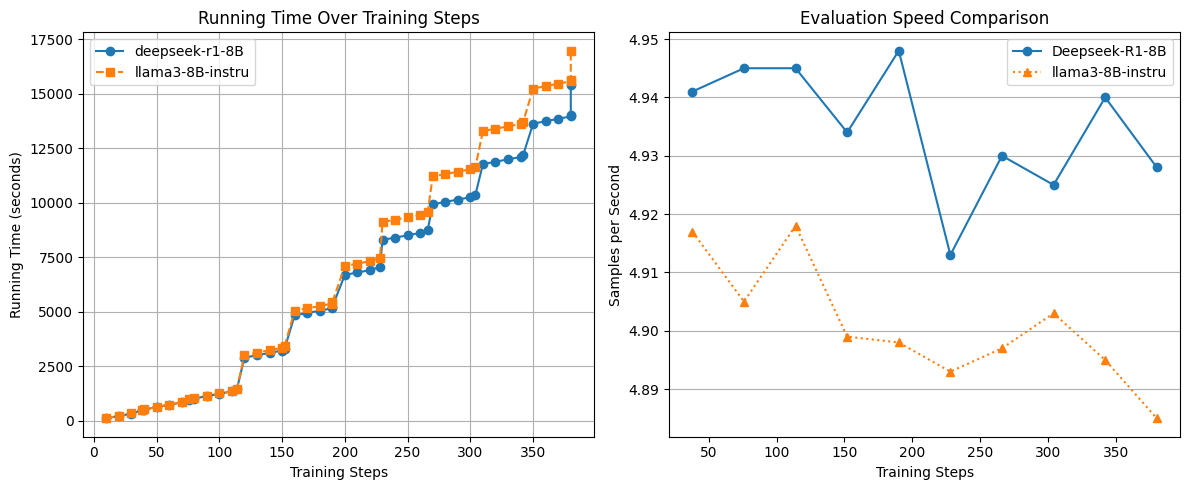

In [25]:
df_dsr1_h_1 = df_dsr1_h[['train/global_step',"eval/samples_per_second"]].dropna()
df_l3_h_1 = df_l3_h[['train/global_step',"eval/samples_per_second"]].dropna()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left plot: Running time over training steps
axes[0].plot(df_dsr1_h['train/global_step'], df_dsr1_h["_runtime"], label="deepseek-r1-8B", linestyle="-", marker="o")
axes[0].plot(df_l3_h['train/global_step'], df_l3_h["_runtime"], label="llama3-8B-instru", linestyle="--", marker="s")
axes[0].set_xlabel("Training Steps")
axes[0].set_ylabel("Running Time (seconds)")
axes[0].set_title("Running Time Over Training Steps")
axes[0].legend()
axes[0].grid(True)

# Right plot: Evaluation speed comparison
axes[1].plot(df_dsr1_h_1['train/global_step'], df_dsr1_h_1["eval/samples_per_second"], label="Deepseek-R1-8B", linestyle="-", marker="o")
axes[1].plot(df_l3_h_1['train/global_step'], df_l3_h_1["eval/samples_per_second"], label="llama3-8B-instru", linestyle=":", marker="^")
axes[1].set_xlabel("Training Steps")
axes[1].set_ylabel("Samples per Second")
axes[1].set_title("Evaluation Speed Comparison")
axes[1].legend()
axes[1].grid(axis="y")

plt.tight_layout()
plt.show()